### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
sns.set(color_codes=True)

### Loading data

In [2]:
data = pd.read_csv('data.csv')
display(data.head(1))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


### Checking types of data

In [41]:
display(data.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Dropping some columns

In [3]:
data = data.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
display(data.head(1))

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135


### Renaming columns

In [4]:
data = data.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission',
                           'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'})
display(data.head(1))

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135


### Dropping duplicates

In [5]:
print("Number of rows:", data.shape[0])
print("Number of duplicate rows:", data[data.duplicated()].shape[0])
data = data.drop_duplicates()
print("Number of rows after dropping duplicates:", data.shape[0])

Number of rows: 11914
Number of duplicate rows: 989
Number of rows after dropping duplicates: 10925


In [6]:
display(data.count())

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Dropping null or missing values

In [7]:
print("Number of NAs")
display(data.isnull().sum())
print("Dropping NAs")
data = data.dropna()
display(data.count())
print("Checking again the number of NAs")
display(data.isnull().sum())

Number of NAs


Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

Dropping NAs


Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Checking again the number of NAs


Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

### Detecting outliers

Detecting outliers


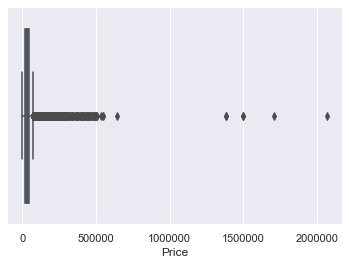

In [8]:
display(sns.boxplot(x=data['Price']))

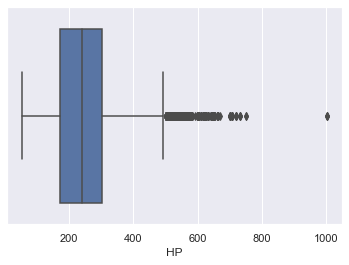

In [9]:
display(sns.boxplot(x=data['HP']))

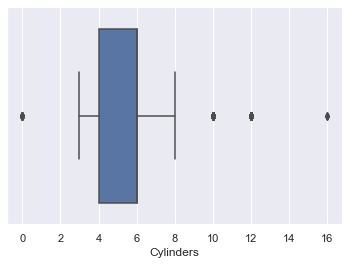

In [10]:
display(sns.boxplot(x=data['Cylinders']))

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [12]:
print('Removing outliers...')
data = data[~((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).any(axis=1)]
print('Data shape:')
display(data.shape)

Removing outliers...
Data shape:


(9191, 10)

### Histograms

Text(0.5, 0, 'Make')

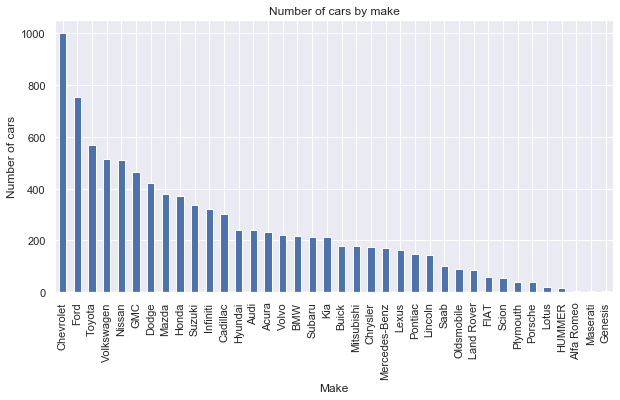

In [14]:
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

### Heat maps

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


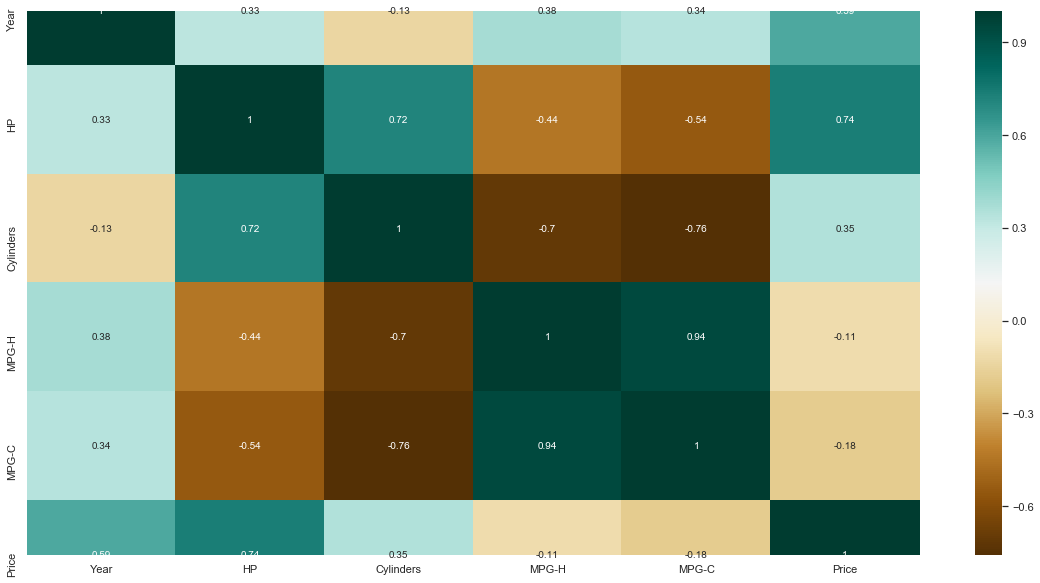

In [15]:
plt.figure(figsize=(20,10))
c=data.corr()
sns.heatmap(c,cmap='BrBG', annot=True)
display(c)

### Scatter plots

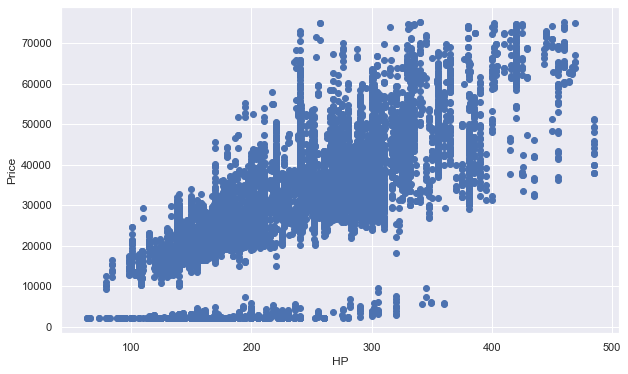

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()